Plot Moroccos hydrogen strategy

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
PATH = '/mnt/c/Users/scl38887/Documents/git/aldehyde/'

In [4]:
# Read data
df = pd.read_csv(PATH+'data/mar_hydrogen_strategy.csv', index_col=0)
#df.drop(['info', 'source'], axis=1, inplace=True)
df

,hydrogen_export,synfuels_export,ammonia_national,demand_national,info,source
year,,,,,,
2030,7,3,3,0.5,hydrogen demand,Ersoy2022 p. 16 (MAR hydrogen strategy)
2040,32,13,13,NaN,hydrogen or synfuels demand?,Ersoy2022 p. 16 (MAR hydrogen strategy)
2050,81,33,19,18.0,hydrogen demand,Ersoy2022 p. 16 (MAR hydrogen strategy)


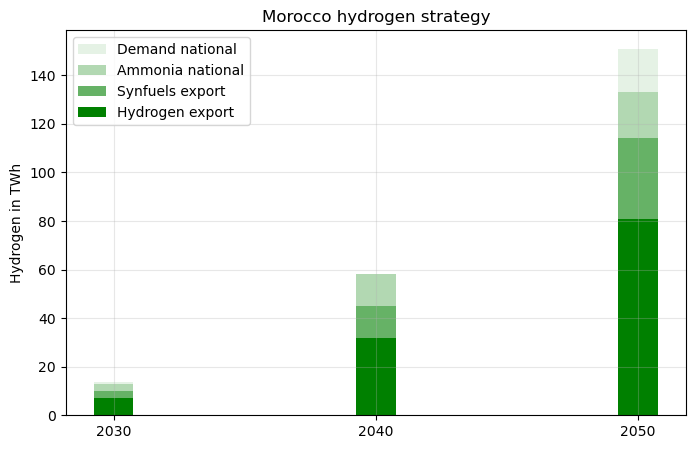

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# define if grouped or stacked
TYPE= "stacked" # "grouped" or "stacked"

# copy the data
df_plot = df

# get the index values
index = np.arange(len(df_plot['hydrogen_export']))

# get the width of each bar
width = 0.15

fig, ax = plt.subplots(figsize=(8, 5))

# create the bars for each technology (GROUPED)
# ammonia_national = plt.bar(index, df_plot['ammonia_national'], width, label='Ammonia national', color='green', alpha=0.3)
# synfuels_export = plt.bar(index + width, df_plot['synfuels_export'], width, label='Synfuels export', color='green', alpha=0.6)
# hydrogen_export = plt.bar(index + 2 * width, df_plot['hydrogen_export'], width, label='Hydrogen export', color='green', alpha=1)

if TYPE=="stacked":
    # create the bars for each technology (STACKED)
    demand_national = plt.bar(index, df_plot['demand_national'], width, bottom=df_plot['hydrogen_export']+df_plot['synfuels_export']+df_plot['ammonia_national'], label='Demand national', color='green', alpha=0.1)
    ammonia_national = plt.bar(index, df_plot['ammonia_national'], width, bottom=df_plot['hydrogen_export']+df_plot['synfuels_export'], label='Ammonia national', color='green', alpha=0.3)
    synfuels_export = plt.bar(index, df_plot['synfuels_export'], width, bottom=df_plot['hydrogen_export'], label='Synfuels export', color='green', alpha=0.6)
    hydrogen_export = plt.bar(index, df_plot['hydrogen_export'], width, label='Hydrogen export', color='green', alpha=1)

    plt.xticks(index, df_plot.index)
else:
    # create the bars for each technology (GROUPED)
    ammonia_national = plt.bar(index + width/2, df_plot['ammonia_national'], width, label='Ammonia national', color='green', alpha=0.3)
    synfuels_export = plt.bar(index + width*1.5, df_plot['synfuels_export'], width, label='Synfuels export', color='green', alpha=0.6)
    hydrogen_export = plt.bar(index + width*2.5, df_plot['hydrogen_export'], width, label='Hydrogen export', color='green', alpha=1)
    demand_national = plt.bar(index - width/2, df_plot['demand_national'], width, label='Demand national', color='green', alpha=0.1)

    plt.xticks(index+width, df_plot.index)

# add labels and title
plt.ylabel('Hydrogen in TWh') #TODO: is the Synfuels export demand in hydrogen or in synfuels?
plt.title('Morocco hydrogen strategy')

plt.grid(alpha=0.3)
plt.legend(loc='best')

# save the plot
if TYPE=="stacked":
    plt.savefig(PATH+'results/graphics/policy/mar_hydrogen_strategy_stacked.pdf', bbox_inches='tight')
else:
    plt.savefig(PATH+'results/graphics/policy/mar_hydrogen_strategy_grouped.pdf', bbox_inches='tight')

# show the plot
plt.show()
